![회귀평가지표](./img/회귀평가.png)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
bostondf = pd.read_csv('boston_house_prices.csv',skiprows=1)

In [12]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
bostondf.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [15]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

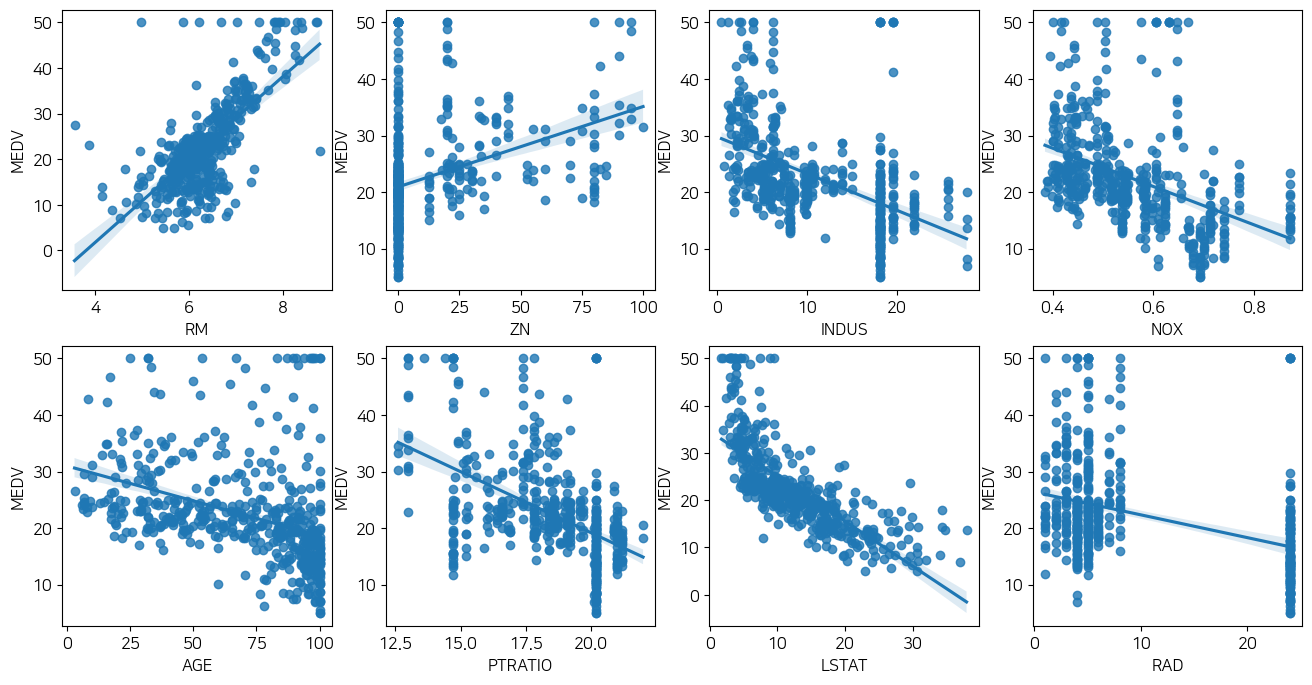

In [16]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='MEDV',data=bostondf,ax=axs[row][col])

In [18]:
y = bostondf['MEDV']
x = bostondf.drop(columns=['MEDV'])

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=156)

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)#np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

mse:17.296915907902093, rmse:4.158956107955708, r2:0.757226332313893


In [28]:
print(f'절편(바이어스):{lr.intercept_}, \n회귀계수(가중치):{np.round(lr.coef_,1)}')

절편(바이어스):40.995595172164506, 
회귀계수(가중치):[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [30]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=x.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [31]:
from sklearn.model_selection import cross_val_score  #교차검증

In [37]:
lr = LinearRegression()
y = bostondf['MEDV']
x = bostondf.drop(columns=['MEDV'])
neg_mse = cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5)
mse = -neg_mse
rmse = np.sqrt(mse)
np.mean(rmse)

5.828658946215835